# Pymaceuticals Inc.
---

### Analysis

1.	Capomulin and Ramicane Show Superior Performance: Both Capomulin and Ramicane have the lowest average tumor volumes and the least variance, indicating consistent and effective treatment in reducing tumor size.
2.	Ceftamin, Infubinol, and Propriva Show Higher Variability: These regimens exhibit larger variability in tumor sizes, as reflected in their standard deviation and interquartile range. Infubinol even has visible outliers, indicating inconsistent effectiveness.
3.	Placebo as a Control: The tumor volumes under the Placebo regimen are among the highest, serving as a baseline comparison to gauge the efficacy of active treatments.
4.	Stelasyn and Zoniferol Share Similarities: Both regimens show relatively high mean tumor volumes and similar variability, suggesting limited effectiveness in tumor reduction compared to Capomulin and Ramicane.
5.	Ketapril and Naftisol Lag in Effectiveness: These regimens also have high mean tumor volumes and variability, indicating they are less effective or inconsistent in treatment outcomes.
 

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
# Checking the number of mice
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [104]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [105]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [106]:
# Ensure every row has a unique Mouse ID by dropping duplicates
unique_mouse_data = combined_data.drop_duplicates(subset="Mouse ID", keep="first")

# Display the cleaned DataFrame with unique Mouse IDs
unique_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [107]:
# Checking the number of mice in the clean DataFrame
number_of_clean_mice = cleaned_data["Mouse ID"].nunique()
number_of_clean_mice

248

## Summary Statistics

In [108]:
# Group data by Drug Regimen
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate the summary statistics
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": grouped_data["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": grouped_data["Tumor Volume (mm3)"].median(),
    "Tumor Variance": grouped_data["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": grouped_data["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": grouped_data["Tumor Volume (mm3)"].sem()
})

# Display the resulting summary DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [109]:
# Using the aggregation method to produce summary statistics in a single line
summary_stats_agg = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    Std_Err="sem"
)

# Display the resulting summary DataFrame
summary_stats_agg


,Mean,Median,Variance,Std_Dev,Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

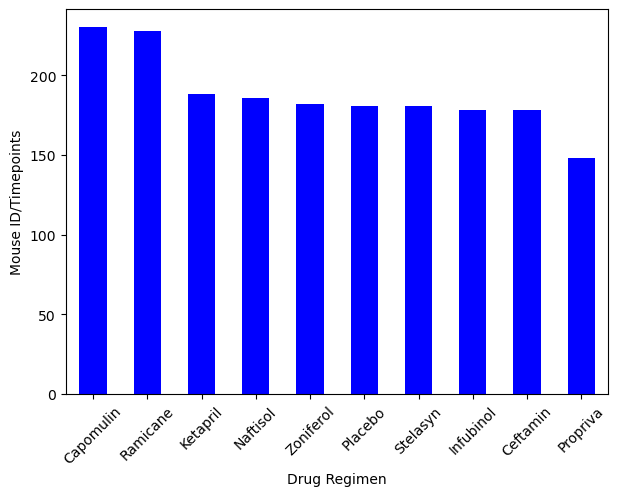

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mouse_count_per_regimen = cleaned_data["Drug Regimen"].value_counts()

# Create the bar plot
mouse_count_per_regimen.plot(kind="bar", figsize=(7, 5), color="blue")

# Label axes
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID/Timepoints")

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45)

# Set ticks to appear on the outside
plt.tick_params(axis="both", which="both", direction="out")

# Display the plot
plt.show()

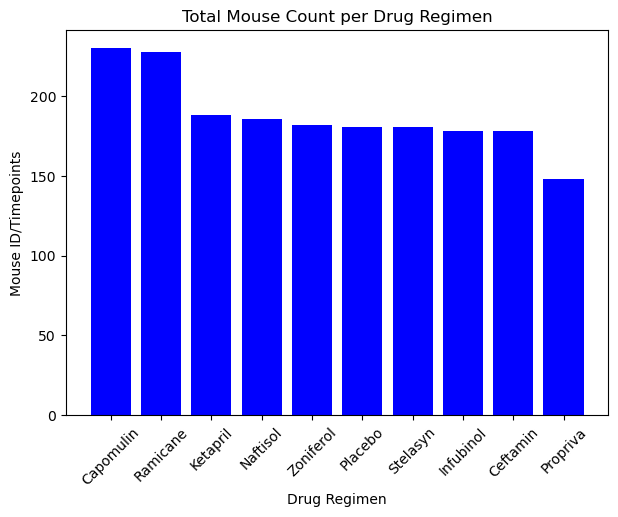

In [111]:
# Create the bar plot with pyplot and rotate x-axis labels 45 degrees
plt.figure(figsize=(7, 5))
plt.bar(mouse_count_per_regimen.index, mouse_count_per_regimen.values, color="blue")

# Label the plot
plt.title("Total Mouse Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID/Timepoints")

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45)

# Set ticks to appear on the outside
plt.tick_params(axis="both", which="both", direction="out")

# Display the plot
plt.show()

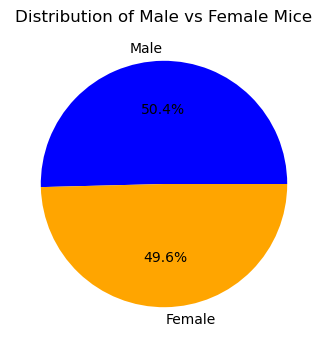

In [112]:
# Get the unique mice with their gender
unique_mice_gender = cleaned_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart using Pandas with adjusted colors
unique_mice_gender.plot(
    kind="pie", 
    autopct="%1.1f%%", 
    figsize=(4, 4), 
    title="Distribution of Male vs Female Mice", 
    ylabel="", 
    colors=["blue", "orange"]
)

# Display the chart
plt.show()

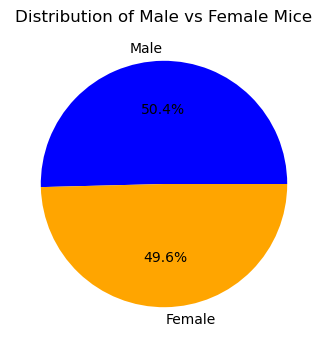

In [113]:
# Generate the pie chart using pyplot
plt.figure(figsize=(4, 4))
plt.pie(
    unique_mice_gender, 
    labels=unique_mice_gender.index, 
    autopct="%1.1f%%", 
    colors=["blue", "orange"]
)

# Add title
plt.title("Distribution of Male vs Female Mice")

# Display the chart
plt.show()


## Quartiles, Outliers and Boxplots

In [114]:
# Filter the data for the selected treatment regimens
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])

# Filter the merged DataFrame for the selected treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(selected_regimens)]

# Display the resulting DataFrame
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Dictionary to store outlier information
outliers_dict = {}

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR for the treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    outliers_dict[treatment] = outliers

# Display tumor volume data and outlier information
print("Tumor Volume Data:", tumor_vol_data)
print("Outliers Information:", outliers_dict)

Tumor Volume Data: [19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0      67.973419
1      65.525743
11     57.03

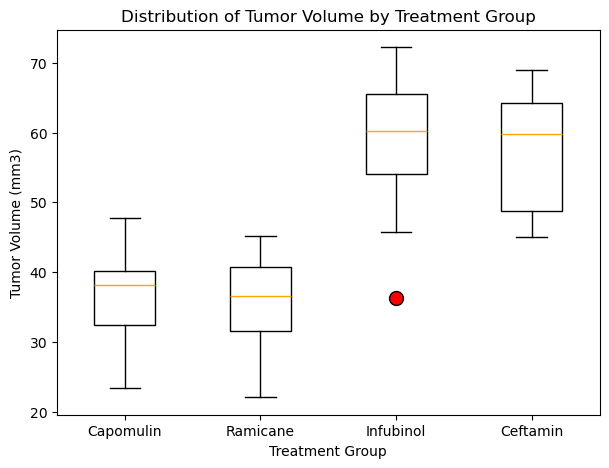

In [116]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group with customized outlier styling
plt.figure(figsize=(7, 5))

# Create the boxplot with custom outlier properties
plt.boxplot(
    tumor_vol_data,
    tick_labels=treatments,
    patch_artist=True,
    boxprops=dict(facecolor="white"),
    medianprops=dict(color="orange"),
    flierprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black", markersize=10)
)

# Add title and labels
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

## Line and Scatter Plots

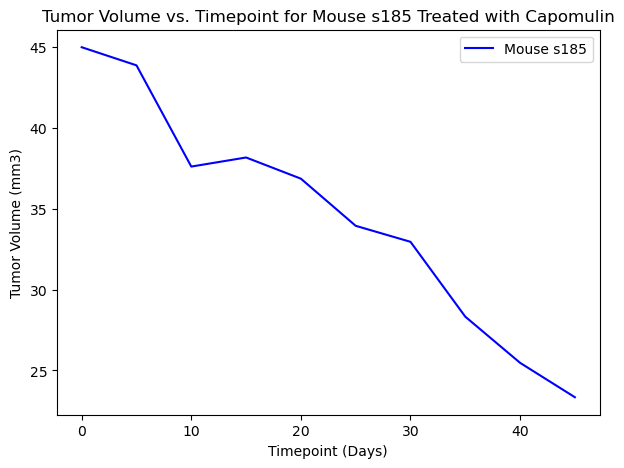

In [117]:
# Select a single Mouse ID treated with Capomulin
mouse_id = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0]

# Filter the data for the selected Mouse ID
mouse_data = cleaned_data[(cleaned_data["Mouse ID"] == mouse_id) & (cleaned_data["Drug Regimen"] == "Capomulin")]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(7, 5))
plt.plot(
    mouse_data["Timepoint"], 
    mouse_data["Tumor Volume (mm3)"], 
    color="blue", 
    label=f"Mouse {mouse_id}"
)

# Add title and labels
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Add legend
plt.legend()

# Display the plot
plt.show()

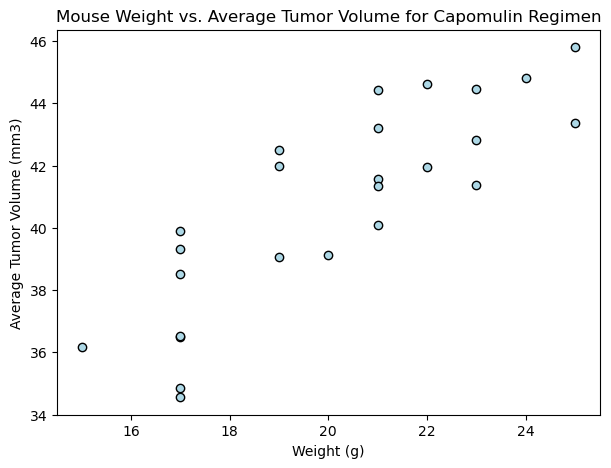

In [118]:
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse for the entire Capomulin regimen
capomulin_avg_tumor = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")
).reset_index()

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(7, 5))
plt.scatter(capomulin_avg_tumor["Weight"], capomulin_avg_tumor["Avg_Tumor_Volume"], color="lightblue", edgecolor="black")

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()

## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is 0.84


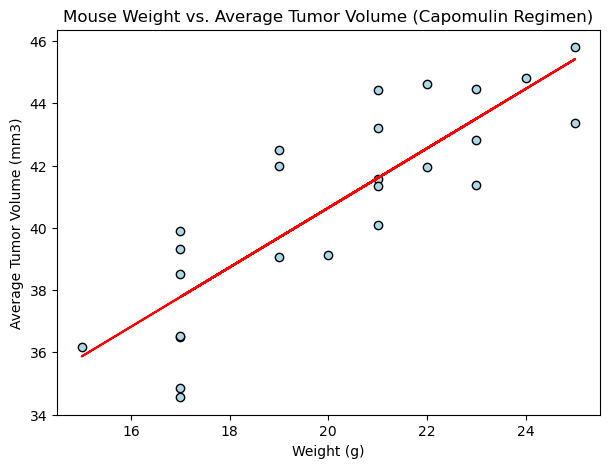

In [119]:
from scipy.stats import linregress

# Extract weight and average tumor volume
weight = capomulin_avg_tumor["Weight"]
avg_tumor_volume = capomulin_avg_tumor["Avg_Tumor_Volume"]

# Calculate the correlation coefficient
correlation = weight.corr(avg_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, avg_tumor_volume)

# Generate regression line
regression_line = slope * weight + intercept

# Display the results
plt.figure(figsize=(7, 5))
plt.scatter(weight, avg_tumor_volume, color="lightblue", edgecolor="black", label="Data")
plt.plot(weight, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the correlation coefficient
print(f"The Correlation between mouse weight and the average tumor volume is {correlation:.2f}")
plt.show()